# Module A: Hilbert Space and Operators

## Introduction

In quantum mechanics, the **state** of a system is represented by a **vector** in a complex vector space called a **Hilbert space**.

### Key Concepts

| Mathematical Object | Physical Meaning | Python Representation |
|---------------------|------------------|----------------------|
| $\|\psi\rangle$ (ket) | Quantum state | 1D complex NumPy array |
| $\langle\psi\|$ (bra) | Dual vector | Conjugate transpose |
| $\hat{A}$ (operator) | Observable/transformation | 2D complex NumPy array |
| $\langle\psi\|\phi\rangle$ | Inner product | `np.vdot(psi, phi)` |

### Dirac Notation

- **Ket**: $|\psi\rangle$ = column vector
- **Bra**: $\langle\psi| = |\psi\rangle^\dagger$ = row vector (conjugate transpose)
- **Inner product**: $\langle\phi|\psi\rangle = \sum_i \phi_i^* \psi_i$

In [10]:
# ============================================================
# IMPORTS
# ============================================================
import numpy as np
import matplotlib.pyplot as plt

# Set up nice plotting
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 11
plt.rcParams['font.family'] = 'DejaVu Sans'

## State Vectors

A quantum state in an $N$-dimensional Hilbert space is:

$$|\psi\rangle = \sum_{i=0}^{N-1} c_i |i\rangle = \begin{pmatrix} c_0 \\ c_1 \\ \vdots \\ c_{N-1} \end{pmatrix}$$

where:
- $c_i \in \mathbb{C}$ are **complex amplitudes**
- $|c_i|^2$ is the **probability** of finding state $|i\rangle$
- **Normalization**: $\langle\psi|\psi\rangle = \sum_i |c_i|^2 = 1$

In [11]:
# ============================================================
# HELPER FUNCTIONS FOR QUANTUM STATES
# ============================================================

def normalize(psi):
    """
    Normalize a quantum state vector.
    
    Normalization ensures ⟨ψ|ψ⟩ = Σ|cᵢ|² = 1
    
    Parameters:
    -----------
    psi : ndarray (complex)
        Unnormalized state vector
        
    Returns:
    --------
    psi_norm : ndarray (complex)
        Normalized state with ||ψ|| = 1
    """
    norm = np.sqrt(np.vdot(psi, psi))  # vdot handles complex conjugation
    return psi / norm


def inner_product(phi, psi):
    """
    Compute inner product ⟨φ|ψ⟩.
    
    In Dirac notation: ⟨φ|ψ⟩ = Σᵢ φᵢ* ψᵢ
    
    Parameters:
    -----------
    phi, psi : ndarray (complex)
        State vectors
        
    Returns:
    --------
    complex
        The inner product (a complex number)
    """
    return np.vdot(phi, psi)  # np.vdot conjugates the first argument


def outer_product(psi, phi):
    """
    Compute outer product |ψ⟩⟨φ|.
    
    This produces an operator (matrix).
    
    Parameters:
    -----------
    psi, phi : ndarray (complex)
        State vectors
        
    Returns:
    --------
    ndarray (complex)
        N×N matrix representing |ψ⟩⟨φ|
    """
    # |ψ⟩⟨φ| : (N,1) × (1,N) → (N,N)
    return np.outer(psi, np.conj(phi))


def expectation_value(psi, A):
    """
    Compute expectation value ⟨ψ|Â|ψ⟩.
    
    This is the average value of observable Â in state |ψ⟩.
    
    Parameters:
    -----------
    psi : ndarray (complex)
        Normalized state vector
    A : ndarray (complex)
        Hermitian operator matrix
        
    Returns:
    --------
    float
        The expectation value (real for Hermitian A)
    """
    # ⟨ψ|A|ψ⟩ = ψ† · A · ψ
    return np.real(np.vdot(psi, A @ psi))  # Real for Hermitian operators

In [12]:
# Test the helper functions
print("Testing helper functions:")
print("="*50)

# Create a state vector (unnormalized)
psi = np.array([1, 1j, 2], dtype=complex)
print(f"Original state: {psi}")
print(f"Norm before: {np.sqrt(np.vdot(psi, psi)):.4f}")

# Normalize
psi_norm = normalize(psi)
print(f"Normalized: {psi_norm}")
print(f"Norm after: {np.sqrt(np.vdot(psi_norm, psi_norm)):.4f}")

# Inner product
phi = normalize(np.array([1, 0, 0], dtype=complex))  # Basis state |0⟩
ip = inner_product(phi, psi_norm)
print(f"\n⟨0|ψ⟩ = {ip:.4f}")
print(f"|⟨0|ψ⟩|² = {np.abs(ip)**2:.4f} (probability of measuring |0⟩)")

Testing helper functions:
Original state: [1.+0.j 0.+1.j 2.+0.j]
Norm before: 2.4495+0.0000j
Normalized: [0.40824829+0.j         0.        +0.40824829j 0.81649658+0.j        ]
Norm after: 1.0000+0.0000j

⟨0|ψ⟩ = 0.4082+0.0000j
|⟨0|ψ⟩|² = 0.1667 (probability of measuring |0⟩)


## Operators in Quantum Mechanics

### What is an Operator?

An **operator** $\hat{A}$ maps states to states: $\hat{A}|\psi\rangle = |\psi'\rangle$

In finite dimensions, operators are **matrices**.

### Hermitian Operators (Observables)

An operator is **Hermitian** if $\hat{A} = \hat{A}^\dagger$ (self-adjoint)

Properties:
- Real eigenvalues → measurable values
- Orthogonal eigenvectors → measurement basis
- $A_{ij} = A_{ji}^*$

### The Pauli Matrices

The most important 2×2 operators in quantum mechanics:

$$\sigma_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
\sigma_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

Physical meaning:
- $\sigma_z$: spin along z-axis (eigenvalues +1, -1)
- $\sigma_x$: spin along x-axis
- $\sigma_y$: spin along y-axis

In [13]:
# ============================================================
# PAULI MATRICES
# ============================================================

# Identity matrix
I = np.array([[1, 0],
              [0, 1]], dtype=complex)

# Pauli X (bit flip / NOT gate)
# Swaps |0⟩ ↔ |1⟩
sigma_x = np.array([[0, 1],
                    [1, 0]], dtype=complex)

# Pauli Y (bit + phase flip)
sigma_y = np.array([[0, -1j],
                    [1j, 0]], dtype=complex)

# Pauli Z (phase flip)
# Eigenvalues: +1 for |0⟩, -1 for |1⟩
sigma_z = np.array([[1, 0],
                    [0, -1]], dtype=complex)

# Store in dictionary for easy access
pauli = {'I': I, 'X': sigma_x, 'Y': sigma_y, 'Z': sigma_z}

print("Pauli Matrices:")
for name, matrix in pauli.items():
    print(f"\nσ_{name}:")
    print(matrix)

Pauli Matrices:

σ_I:
[[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

σ_X:
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

σ_Y:
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

σ_Z:
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


In [14]:
def is_hermitian(A, tol=1e-10):
    """
    Check if an operator is Hermitian (A = A†).
    
    A Hermitian matrix equals its conjugate transpose.
    
    Parameters:
    -----------
    A : ndarray (complex)
        Square matrix to check
    tol : float
        Numerical tolerance for comparison
        
    Returns:
    --------
    bool
        True if A is Hermitian
    """
    A_dagger = np.conj(A.T)  # Conjugate transpose
    return np.allclose(A, A_dagger, atol=tol)


# Verify Pauli matrices are Hermitian
print("Hermiticity Check:")
print("="*40)
for name, matrix in pauli.items():
    is_herm = is_hermitian(matrix)
    print(f"σ_{name} is Hermitian: {is_herm}")

Hermiticity Check:
σ_I is Hermitian: True
σ_X is Hermitian: True
σ_Y is Hermitian: True
σ_Z is Hermitian: True


In [15]:
# ============================================================
# 3-LEVEL "POSITION" OPERATOR EXAMPLE
# ============================================================

# A simple 3-level system with position-like operator
# Represents a particle at positions x = -1, 0, +1

X_position = np.array([[-1, 0, 0],
                       [0, 0, 0],
                       [0, 0, 1]], dtype=complex)

print("3-Level Position Operator:")
print(X_position)
print(f"\nIs Hermitian: {is_hermitian(X_position)}")

# Eigenvalues represent possible measurement outcomes
eigenvalues = np.linalg.eigvalsh(X_position)
print(f"Eigenvalues (position values): {eigenvalues}")

3-Level Position Operator:
[[-1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j]]

Is Hermitian: True
Eigenvalues (position values): [-1.  0.  1.]


## Visualizing Quantum States

### Why Bar Charts?

A quantum state $|\psi\rangle = \sum_i c_i |i\rangle$ has complex amplitudes $c_i = a_i + ib_i$.

We can visualize:
- **Real parts**: $\text{Re}(c_i)$ → blue bars
- **Imaginary parts**: $\text{Im}(c_i)$ → red bars
- **Probabilities**: $|c_i|^2$ → green bars

This shows the **superposition structure** — how the state is "spread" across the basis.

In [16]:
def plot_state(psi, basis_labels=None, title="Quantum State Components"):
    """
    Visualize a quantum state as a bar chart.
    
    Shows real and imaginary parts of amplitudes.
    
    Parameters:
    -----------
    psi : ndarray (complex)
        State vector
    basis_labels : list of str, optional
        Labels for basis states (e.g., ['|0⟩', '|1⟩'])
    title : str
        Plot title
    """
    N = len(psi)
    if basis_labels is None:
        basis_labels = [f'|{i}⟩' for i in range(N)]
    
    x = np.arange(N)
    width = 0.35
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Left: Real and Imaginary parts
    ax1.bar(x - width/2, np.real(psi), width, label='Real', color='steelblue', alpha=0.8)
    ax1.bar(x + width/2, np.imag(psi), width, label='Imag', color='coral', alpha=0.8)
    ax1.axhline(0, color='black', linewidth=0.5)
    ax1.set_xticks(x)
    ax1.set_xticklabels(basis_labels)
    ax1.set_ylabel('Amplitude')
    ax1.set_title('State Amplitudes (Real & Imaginary)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Right: Probabilities
    probs = np.abs(psi)**2
    bars = ax2.bar(x, probs, color='seagreen', alpha=0.8)
    ax2.set_xticks(x)
    ax2.set_xticklabels(basis_labels)
    ax2.set_ylabel('Probability')
    ax2.set_title('Measurement Probabilities |cᵢ|²')
    ax2.set_ylim(0, 1.1 * max(probs) if max(probs) > 0 else 1)
    ax2.grid(True, alpha=0.3)
    
    # Label bars with values
    for bar, p in zip(bars, probs):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{p:.2f}', ha='center', va='bottom', fontsize=10)
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

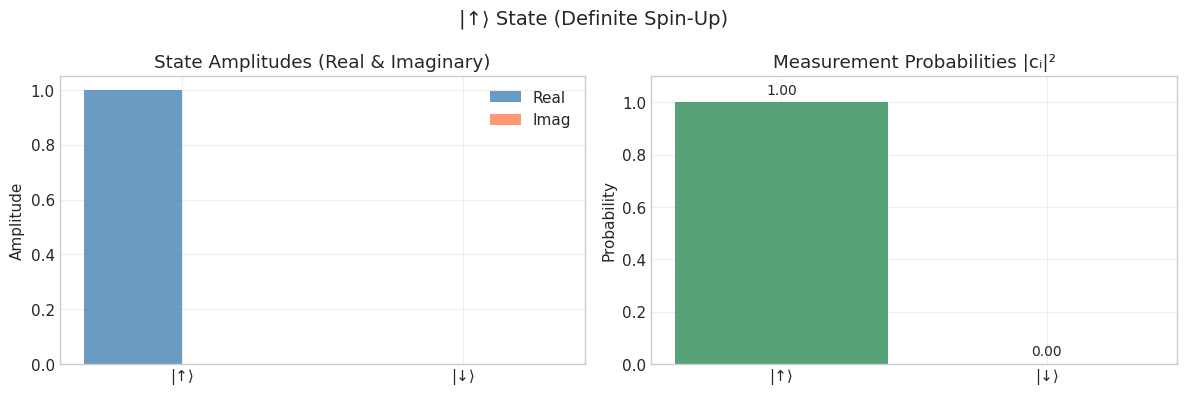

In [17]:
# ============================================================
# EXAMPLES: Visualizing Different States
# ============================================================

# Example 1: Spin-up state |↑⟩ = |0⟩
spin_up = np.array([1, 0], dtype=complex)
plot_state(spin_up, ['|↑⟩', '|↓⟩'], '|↑⟩ State (Definite Spin-Up)')

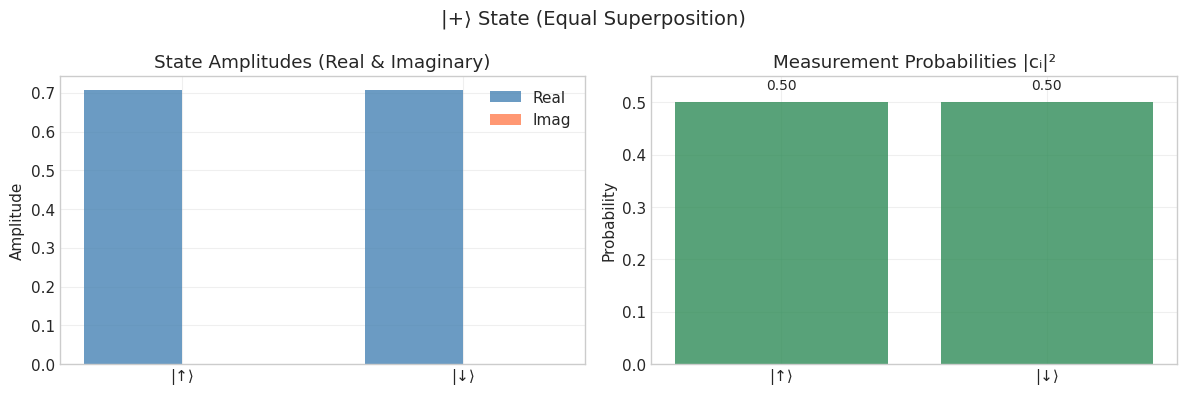

In [18]:
# Example 2: Equal superposition |+⟩ = (|↑⟩ + |↓⟩)/√2
plus = normalize(np.array([1, 1], dtype=complex))
plot_state(plus, ['|↑⟩', '|↓⟩'], '|+⟩ State (Equal Superposition)')

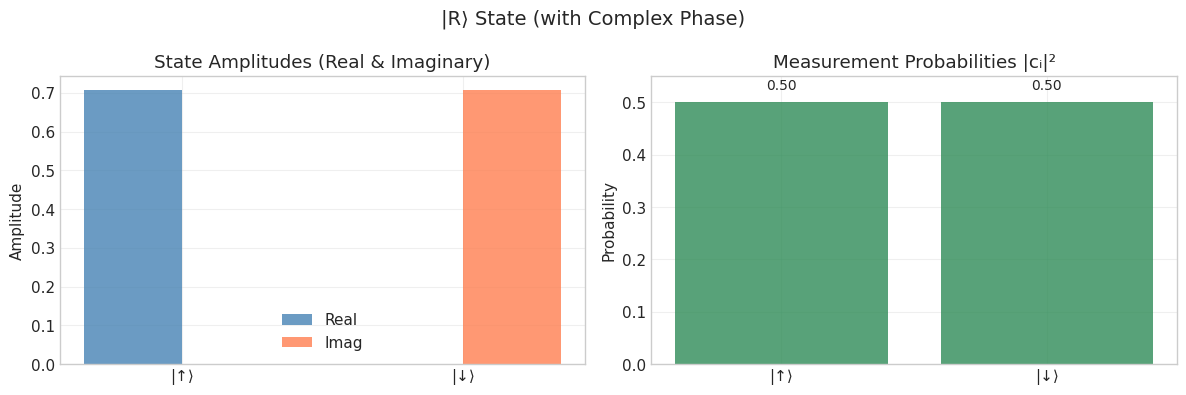

In [19]:
# Example 3: State with complex phase
# |R⟩ = (|↑⟩ + i|↓⟩)/√2 (right-circular polarization analog)
right = normalize(np.array([1, 1j], dtype=complex))
plot_state(right, ['|↑⟩', '|↓⟩'], '|R⟩ State (with Complex Phase)')

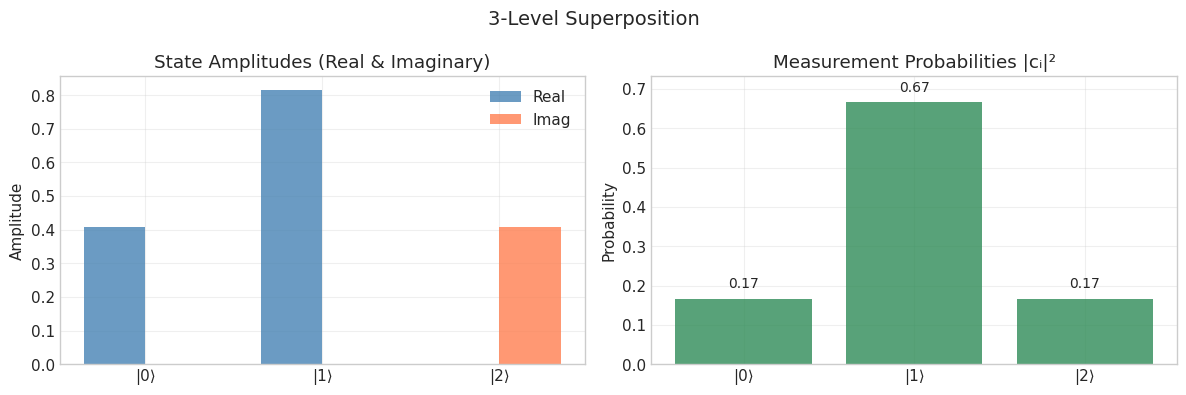

In [20]:
# Example 4: 3-level superposition
psi_3level = normalize(np.array([1, 2, 1j], dtype=complex))
plot_state(psi_3level, ['|0⟩', '|1⟩', '|2⟩'], '3-Level Superposition')

## Expectation Values

### Physical Interpretation

The **expectation value** $\langle\hat{A}\rangle = \langle\psi|\hat{A}|\psi\rangle$ is the average result you'd get if you:
1. Prepared many identical copies of $|\psi\rangle$
2. Measured $\hat{A}$ on each copy
3. Computed the average

### Example: Spin Components

For a spin-1/2 particle in state $|\psi\rangle$:
- $\langle\sigma_z\rangle$ = average spin along z-axis
- $\langle\sigma_x\rangle$ = average spin along x-axis

In [22]:
# Compute expectation values for different states
states = {
    '|↑⟩': np.array([1, 0], dtype=complex),
    '|↓⟩': np.array([0, 1], dtype=complex),
    '|+⟩': normalize(np.array([1, 1], dtype=complex)),
    '|−⟩': normalize(np.array([1, -1], dtype=complex)),
    '|R⟩': normalize(np.array([1, 1j], dtype=complex)),
    '|L⟩': normalize(np.array([1, -1j], dtype=complex)),
}

print("Expectation Values of Pauli Operators:")
print("="*50)
print(f"{'State':^10} {'⟨σx⟩':^10} {'⟨σy⟩':^10} {'⟨σz⟩':^10}")
print("-"*50)

for name, psi in states.items():
    ex = expectation_value(psi, sigma_x)
    ey = expectation_value(psi, sigma_y)
    ez = expectation_value(psi, sigma_z)
    print(f"{name:^10} {ex:^10.2f} {ey:^10.2f} {ez:^10.2f}")

print("="*50)
print("\nNote: |↑⟩, |↓⟩ are eigenstates of σz")
print("      |+⟩, |−⟩ are eigenstates of σx")
print("      |R⟩, |L⟩ are eigenstates of σy")

Expectation Values of Pauli Operators:
  State       ⟨σx⟩       ⟨σy⟩       ⟨σz⟩   
--------------------------------------------------
   |↑⟩        0.00       0.00       1.00   
   |↓⟩        0.00       0.00      -1.00   
   |+⟩        1.00       0.00      -0.00   
   |−⟩       -1.00       0.00      -0.00   
   |R⟩        0.00       1.00       0.00   
   |L⟩        0.00      -1.00       0.00   

Note: |↑⟩, |↓⟩ are eigenstates of σz
      |+⟩, |−⟩ are eigenstates of σx
      |R⟩, |L⟩ are eigenstates of σy


## Summary

### What We Learned

1. **States as vectors**: Quantum states are complex vectors that must be normalized
2. **Operators as matrices**: Observables are Hermitian matrices
3. **Inner products**: $\langle\phi|\psi\rangle$ gives overlap/probability amplitude
4. **Expectation values**: $\langle\hat{A}\rangle$ is the average measurement result

### Key Functions Implemented

| Function | Purpose |
|----------|--------|
| `normalize(psi)` | Normalize state to unit length |
| `inner_product(phi, psi)` | Compute ⟨φ|ψ⟩ |
| `outer_product(psi, phi)` | Compute |ψ⟩⟨φ| |
| `expectation_value(psi, A)` | Compute ⟨ψ|A|ψ⟩ |
| `is_hermitian(A)` | Check if A = A† |
| `plot_state(psi)` | Visualize state amplitudes |